---
# Fitting a noisy signal with polynomials
---

In this example, we show the impact of the noise level and the size of a dataset on the regression performances 
of various-order polynomials. This is a good introduction to underfitting and overfitting.

A noisy (x,y) dataset is generated based on a quadratic model. The dataset is then fitted with polynomials of orders 1, 2 and 4. 


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
# Used for reproductibility of the results
np.random.seed(43)

# The base/reference model is a quadratic polynomial with the following parameters
coeffs = [0.03, 0.2, -2]

x_min = -2.5
x_max = 10.
xx = np.linspace(x_min,x_max,100)[:,np.newaxis]

# Function that generates a random (x,y) dataset with the y data degrated with some gaussian noise.
def generate_data(N, sigma):
    x = np.random.uniform(x_min,x_max,N)
    y = np.polyval(coeffs,x) + np.random.normal(0.0, sigma, N)

    return x, y


## Example with a small number of data

The fits are not very good with a few data, except for the $2^{nd}$ order polynomial. This should not be surprising given that the 
original model from which the data were created is also a quadratic. Lack of fit (underfitting) and too much fit (overfitting) can be seen in the figure.


In [3]:
# Generate a small dataset
N = 10

# Small noise level
sigma = 0.2

x,y = generate_data(N, sigma)

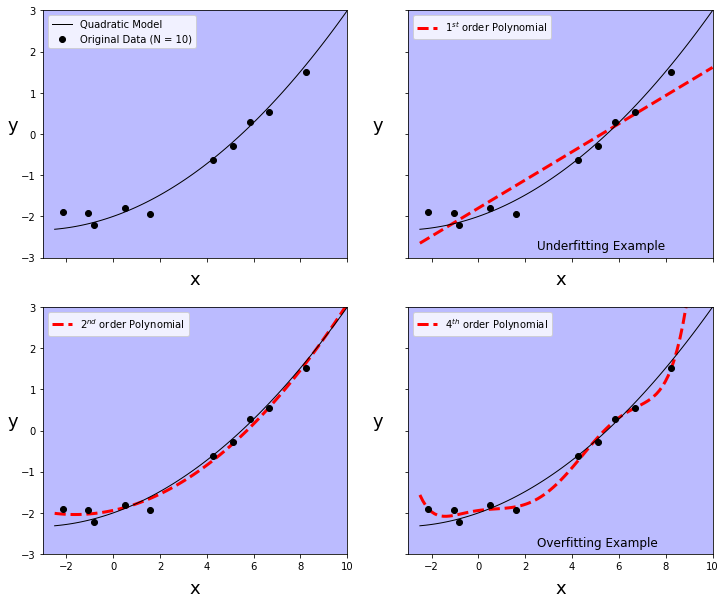

In [4]:
# Analyze and display results for model comparison.

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,sharex=True,sharey=True,figsize=(12,10))

yy0 = np.polyval(coeffs,xx)
ax1.plot(xx, yy0, color='black', linewidth=1)
ax1.plot(x, y, 'o', color='black')
ax1.set_ylabel('y',rotation=0,fontsize=18)
ax1.set_xlabel('x',fontsize=18)
ax1.yaxis.set_label_coords(-0.1,0.5)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_xlim(-3., 10.)
ax1.set_ylim(-3., 3.)
str = 'Original Data (N = %d)' % (N)
ax1.legend(['Quadratic Model', str], loc='upper left')
ax1.set_facecolor('#BBBBFF')


c = np.polyfit(x, y, 1)
yy = np.polyval(c,xx)
ax2.plot(xx, yy, linestyle='--', color='red', linewidth=3)
ax2.plot(xx, yy0, color='black', linewidth=1)
ax2.plot(x, y, 'o', color='black')
ax2.set_ylabel('y',rotation=0,fontsize=18)
ax2.set_xlabel('x',fontsize=18)
ax2.yaxis.set_label_coords(-0.1,0.5)
ax2.xaxis.set_label_coords(0.5, -0.05)
ax2.legend([r"$1^{st}$ order Polynomial"], loc='upper left')
ax2.text(2.5, -2.8, "Underfitting Example", fontsize=12)
ax2.set_facecolor('#BBBBFF')

c = np.polyfit(x, y, 2)
yy = np.polyval(c,xx)
ax3.plot(xx, yy, linestyle='--', color='red', linewidth=3)
ax3.plot(xx, yy0, color='black', linewidth=1)
ax3.plot(x, y, 'o', color='black')
ax3.set_ylabel('y',rotation=0,fontsize=18)
ax3.set_xlabel('x',fontsize=18)
ax3.yaxis.set_label_coords(-0.1,0.5)
ax3.xaxis.set_label_coords(0.5, -0.1)
ax3.legend([r"$2^{nd}$ order Polynomial"], loc='upper left')
ax3.set_facecolor('#BBBBFF')

c = np.polyfit(x, y, 6)
yy = np.polyval(c,xx)
ax4.plot(xx, yy, linestyle='--', color='red', linewidth=3)
ax4.plot(xx, yy0, color='black', linewidth=1)
ax4.plot(x, y, 'o', color='black')
ax4.set_ylabel('y',rotation=0,fontsize=18)
ax4.set_xlabel('x',fontsize=18)
ax4.yaxis.set_label_coords(-0.1,0.5)
ax4.xaxis.set_label_coords(0.5, -0.1)
ax4.legend([r"$4^{th}$ order Polynomial"], loc='upper left')
ax4.text(2.5, -2.8, "Overfitting Example", fontsize=12)
ax4.set_facecolor('#BBBBFF')
plt.savefig('Polynomial_fits_with_small_N_and_small_sigma', format='png')



## Example with the same noise level but with more data

Increasing the number of data points improves a fit as long as a fitting model is complex enough 
to reproduce the underlying trends in the data distribution. Hence, a linear fit with 10x more data 
is still a bad fit but the $4^{th}$ order polynomial now fares better than before. No overfitting can be seen in the fourth panel 

In [5]:
# Generate a larger dataset
N = 100

# Small noise level
sigma = 0.2

x,y = generate_data(N, sigma)

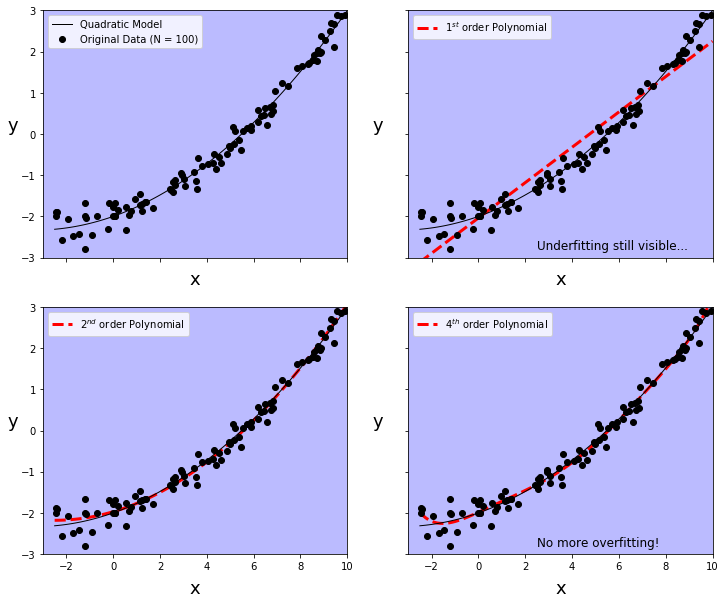

In [6]:
# Analyze and display results for model comparison.

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,sharex=True,sharey=True,figsize=(12,10))

yy0 = np.polyval(coeffs,xx)
ax1.plot(xx, yy0, color='black', linewidth=1)
ax1.plot(x, y, 'o', color='black')
ax1.set_ylabel('y',rotation=0,fontsize=18)
ax1.set_xlabel('x',fontsize=18)
ax1.yaxis.set_label_coords(-0.1,0.5)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_xlim(-3., 10.)
ax1.set_ylim(-3., 3.)
str = 'Original Data (N = %d)' % (N)
ax1.legend(['Quadratic Model', str], loc='upper left')
ax1.set_facecolor('#BBBBFF')


c = np.polyfit(x, y, 1)
yy = np.polyval(c,xx)
ax2.plot(xx, yy, linestyle='--', color='red', linewidth=3)
ax2.plot(xx, yy0, color='black', linewidth=1)
ax2.plot(x, y, 'o', color='black')
ax2.set_ylabel('y',rotation=0,fontsize=18)
ax2.set_xlabel('x',fontsize=18)
ax2.yaxis.set_label_coords(-0.1,0.5)
ax2.xaxis.set_label_coords(0.5, -0.05)
ax2.legend([r"$1^{st}$ order Polynomial"], loc='upper left')
ax2.text(2.5, -2.8, "Underfitting still visible...", fontsize=12)
ax2.set_facecolor('#BBBBFF')

c = np.polyfit(x, y, 2)
yy = np.polyval(c,xx)
ax3.plot(xx, yy, linestyle='--', color='red', linewidth=3)
ax3.plot(xx, yy0, color='black', linewidth=1)
ax3.plot(x, y, 'o', color='black')
ax3.set_ylabel('y',rotation=0,fontsize=18)
ax3.set_xlabel('x',fontsize=18)
ax3.yaxis.set_label_coords(-0.1,0.5)
ax3.xaxis.set_label_coords(0.5, -0.1)
ax3.legend([r"$2^{nd}$ order Polynomial"], loc='upper left')
ax3.set_facecolor('#BBBBFF')

c = np.polyfit(x, y, 6)
yy = np.polyval(c,xx)
ax4.plot(xx, yy, linestyle='--', color='red', linewidth=3)
ax4.plot(xx, yy0, color='black', linewidth=1)
ax4.plot(x, y, 'o', color='black')
ax4.set_ylabel('y',rotation=0,fontsize=18)
ax4.set_xlabel('x',fontsize=18)
ax4.yaxis.set_label_coords(-0.1,0.5)
ax4.xaxis.set_label_coords(0.5, -0.1)
ax4.legend([r"$4^{th}$ order Polynomial"], loc='upper left')
ax4.text(2.5, -2.8, "No more overfitting!", fontsize=12)
ax4.set_facecolor('#BBBBFF')
plt.savefig('Polynomial_fits_with_large_N_and_small_sigma', format='png')



## Example with a larger noise level and more data

We saw that, for a given noise level, increasing the number of data points improves the fits as long as a fitting model 
is complex enough to reproduce the underlying trends in the data distribution. When the noise level increases, those 
underlying trends are hidden and the quadratic model often fares the best.

In [7]:
# Generate a larger dataset
N = 100

# Larger noise level
sigma = 1

x,y = generate_data(N, sigma)

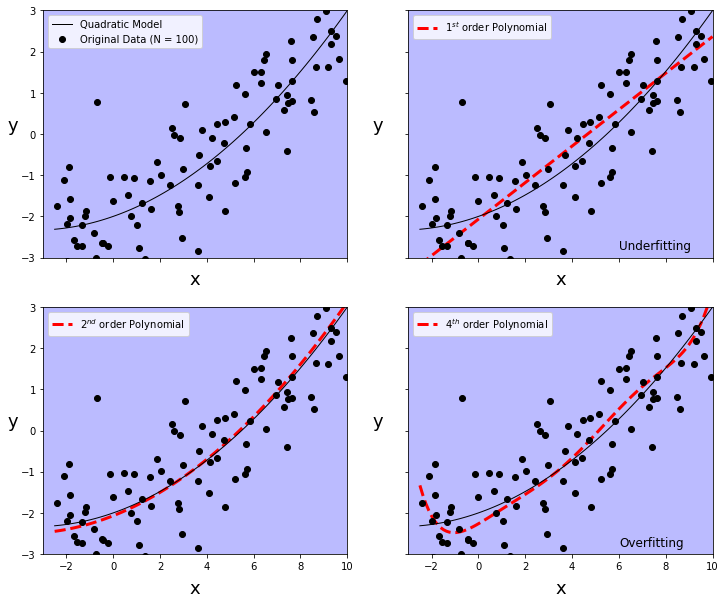

In [8]:
# Analyze and display results for model comparison.

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,sharex=True,sharey=True,figsize=(12,10))

yy0 = np.polyval(coeffs,xx)
ax1.plot(xx, yy0, color='black', linewidth=1)
ax1.plot(x, y, 'o', color='black')
ax1.set_ylabel('y',rotation=0,fontsize=18)
ax1.set_xlabel('x',fontsize=18)
ax1.yaxis.set_label_coords(-0.1,0.5)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_xlim(-3., 10.)
ax1.set_ylim(-3., 3.)
str = 'Original Data (N = %d)' % (N)
ax1.legend(['Quadratic Model', str], loc='upper left')
ax1.set_facecolor('#BBBBFF')


c = np.polyfit(x, y, 1)
yy = np.polyval(c,xx)
ax2.plot(xx, yy, linestyle='--', color='red', linewidth=3)
ax2.plot(xx, yy0, color='black', linewidth=1)
ax2.plot(x, y, 'o', color='black')
ax2.set_ylabel('y',rotation=0,fontsize=18)
ax2.set_xlabel('x',fontsize=18)
ax2.yaxis.set_label_coords(-0.1,0.5)
ax2.xaxis.set_label_coords(0.5, -0.05)
ax2.legend([r"$1^{st}$ order Polynomial"], loc='upper left')
ax2.text(6., -2.8, "Underfitting", fontsize=12)
ax2.set_facecolor('#BBBBFF')

c = np.polyfit(x, y, 2)
yy = np.polyval(c,xx)
ax3.plot(xx, yy, linestyle='--', color='red', linewidth=3)
ax3.plot(xx, yy0, color='black', linewidth=1)
ax3.plot(x, y, 'o', color='black')
ax3.set_ylabel('y',rotation=0,fontsize=18)
ax3.set_xlabel('x',fontsize=18)
ax3.yaxis.set_label_coords(-0.1,0.5)
ax3.xaxis.set_label_coords(0.5, -0.1)
ax3.legend([r"$2^{nd}$ order Polynomial"], loc='upper left')
ax3.set_facecolor('#BBBBFF')

c = np.polyfit(x, y, 6)
yy = np.polyval(c,xx)
ax4.plot(xx, yy, linestyle='--', color='red', linewidth=3)
ax4.plot(xx, yy0, color='black', linewidth=1)
ax4.plot(x, y, 'o', color='black')
ax4.set_ylabel('y',rotation=0,fontsize=18)
ax4.set_xlabel('x',fontsize=18)
ax4.yaxis.set_label_coords(-0.1,0.5)
ax4.xaxis.set_label_coords(0.5, -0.1)
ax4.legend([r"$4^{th}$ order Polynomial"], loc='upper left')
ax4.text(6., -2.8, "Overfitting", fontsize=12)
ax4.set_facecolor('#BBBBFF')
plt.savefig('Polynomial_fits_with_large_N_and_large_sigma', format='png')

